In [ ]:
# import library
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
#Menyimpan file CarPrice_Assignment.csv pada google drive
lokasidata = '/content/drive/MyDrive/File Data Bootcamp/File TUGAS PROJECT/CarPrice_Assignment.csv'
data = pd.read_csv(lokasidata )
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# set style of visualization
sns.set_style ("whitegrid")
sns.set_palette ("RdBu")

In [ ]:
# read data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lokasidata = '/content/drive/MyDrive/File Data Bootcamp/File TUGAS PROJECT'

In [ ]:
# Melihat tipe kolom data dan beberapa informasi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Melihat persentase nilai yang hilang di setiap kolom
data.isna().sum() / data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [ ]:
# Mengecek apabila terjadi duplikasi data
data.duplicated() .any()

False

In [ ]:
# Melihat informasi dari nilai numerik
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Melihat informasi mengenai nilai kategori
data.describe(include = object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


UNIVARIATE ANALYSIS & VISUALIZATIONS

In [ ]:
# first drop car_ID column

data.drop(columns = "car_ID", inplace = True)

In [ ]:
# see sample of data
data.sample(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
40,0,honda accord,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,10295.0
56,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
178,3,toyota corolla liftback,gas,std,two,hatchback,rwd,front,102.9,183.5,...,171,mpfi,3.27,3.350,9.3,161,5200,20,24,16558.0
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,...,121,mpfi,2.54,2.070,9.3,110,5250,21,28,15040.0
148,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,173.6,...,108,2bbl,3.62,2.640,9.0,82,4800,23,29,8013.0
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,...,134,mpfi,3.61,3.210,7.0,142,5600,18,24,18150.0
146,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,173.5,...,108,2bbl,3.62,2.640,9.0,82,4800,28,32,7463.0
196,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.150,9.5,114,5400,24,28,15985.0
180,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,187.8,...,171,mpfi,3.27,3.350,9.2,156,5200,20,24,15690.0
28,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,174.6,...,122,2bbl,3.34,3.460,8.5,88,5000,24,30,8921.0


In [ ]:
# create function to visualized categorical column using count plot
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized categorical column using pie plot
def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage
    """
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [ ]:
# create function that visualized numeric columns using box plot
def box_plot(column_name):
  """
  input : column name, column data type must be numeric
  output : box plot to see distribution of column values such as min, max, mean, medien, std
  """
  sns.boxplot(y = column_name, data = data)
  plt.xlabel(column_name)
  plt.ylabel("FRQ")
  plt.show()

DISCOVERING SYMBOLING COLUMN

In [ ]:
# see unique values
data["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

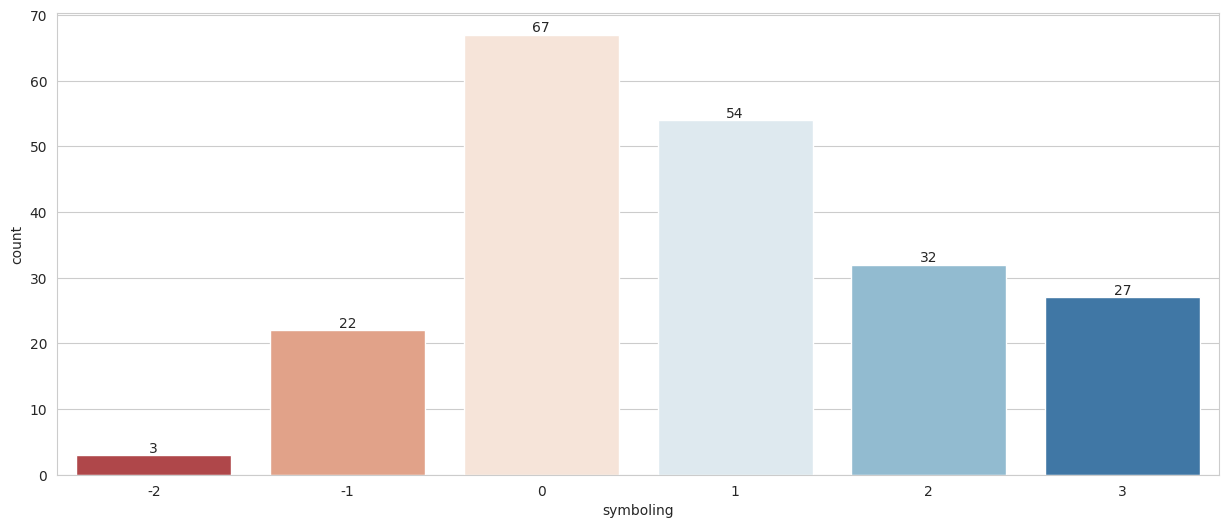

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "symboling")

DISCOVERING CARNAME COLUMN

In [ ]:
# see number of unique value
data["CarName"].nunique()

147

In [ ]:
# see nuique values
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

* number of unique value is too large, wee need to minimize it

In [ ]:
# create function to clean car name column
def clean_car_name(car_name : str)-> str:
  """
  input : car name from car_name column
  output : remove number and model of car and convert all to lower wordd
  """
  return car_name.split(" ")[0].lower()

In [ ]:
# apply clean_car_name function to can name column
data["CarName"] = data["CarName"].apply(clean_car_name)

In [ ]:
# see unique value after cleaning
data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

a few typos of CarName:
- maxda = mazda
- porsche - porcshce
- toyota = toyouta
- vokswagen = vw = volkswagen

In [ ]:
# replace some names with correct name

data["CarName"] = data["CarName"].replace({'maxda' : 'mazda', 'porsche' : 'porcshce', 'toyota' : 'toyouta', 'vw' : 'volkswagen',
                                          'vokswagen' : 'volkswagen'})

In [ ]:
# see unique value after fished cleaning
data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyouta', 'volkswagen', 'volvo'], dtype=object)

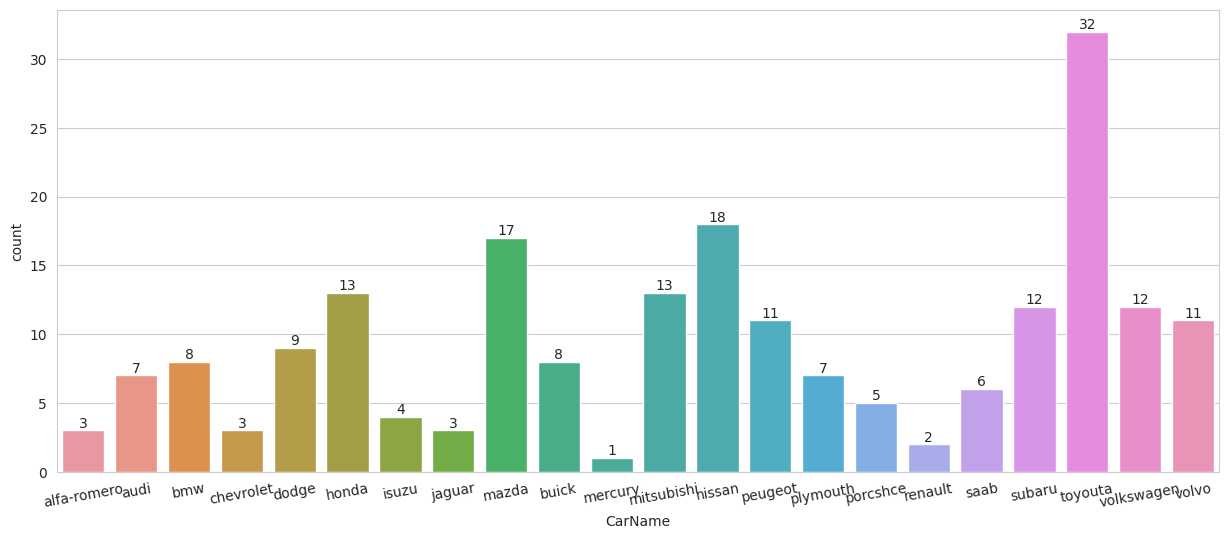

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "CarName", rotation = 10)
plt.show()

* Toyota is the most favoried car and Mercury is the least

DISCOVERING FUELTYPE COLUMN

In [ ]:
# see unique values
data["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

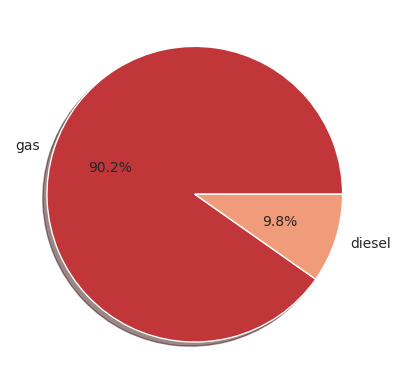

In [ ]:
# number of unique values is small, which is appropriate with pie plot
pie_plot("fueltype")
# call function i create it in cell 12

* Most fuel type is Gas

DISCOVERING ASPIRATION S=COLUMN

In [ ]:
# see unique values
data["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

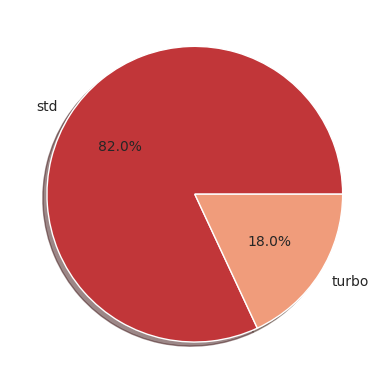

In [ ]:
# number of unique values is small, which is appropriate with pie plt.plot
pie_plot("aspiration")
# call function i create it in cell 12

* Most cars supplying air to engine using naturally aspirated.

DISCOVERING DOORNUMBER COLUMN

In [ ]:
# see unique value
data["doornumber"].unique()

array(['two', 'four'], dtype=object)

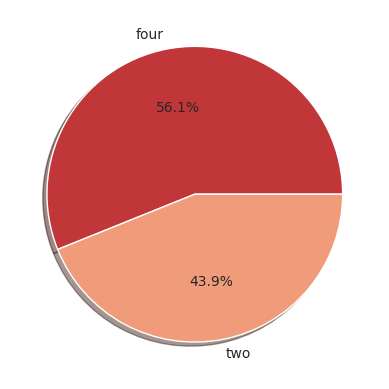

In [ ]:
# number of unique values is small, which is appropriate withh pie plot
pie_plot("doornumber")
# call function i create it in cell 12

* Most cars have four doors

DISCOVERING CARBODY COLUMN

In [ ]:
# see unique values
data["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

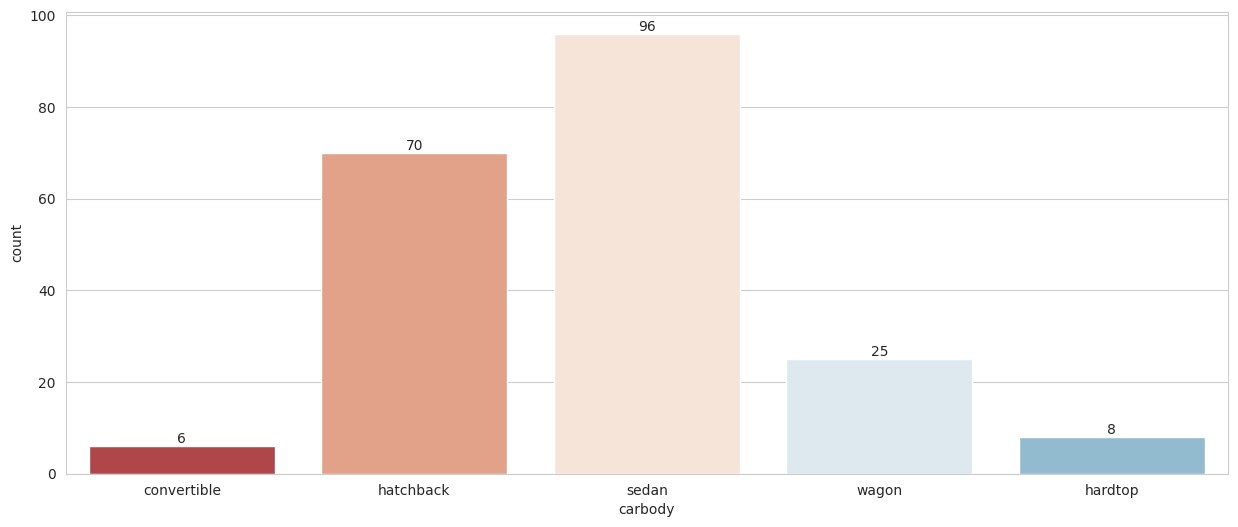

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "carbody")

* Most Cars is sedan

DISCOVERING DRIVEWHEEL COLUMN

In [ ]:
# see unique values
data["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

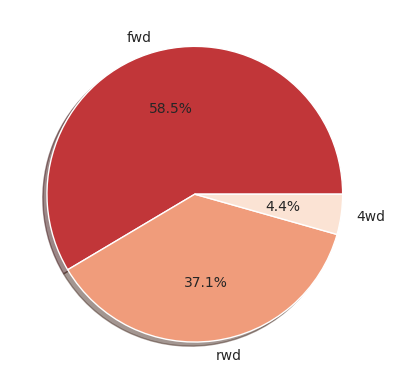

In [ ]:
# number of unique values is small, which is appropriate with pie plot
pie_plot("drivewheel")
# call function i create it in cell 12

* Most cars with front-wheel drive

DISCOVERING ENGINELOCATION COLUMN

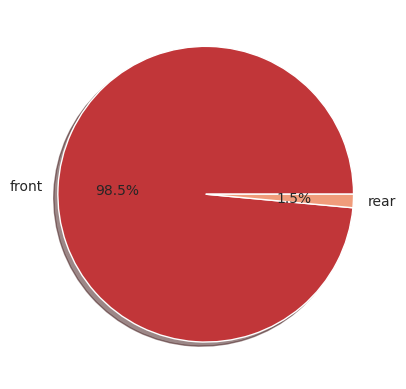

In [ ]:
# number of unique values is small, which is appropriate with pie plot
pie_plot("enginelocation")
# call function i create it in cell 12

DISCOVERING WHEELBASE COLUMN

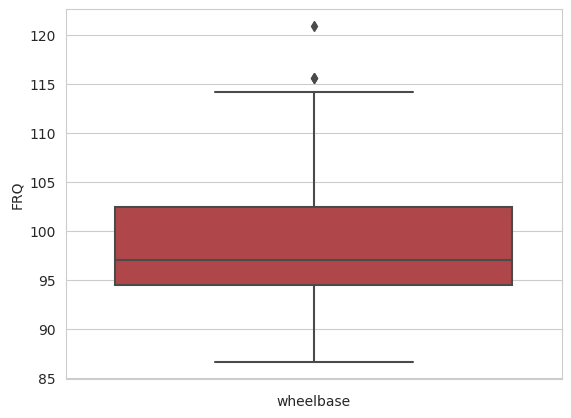

In [ ]:
# see distribution
box_plot("wheelbase")
# call function i create it in cell 13

We can see
-  most cars has A medium wheelbase
-  avrage distance between the centers of the front and rear wheels is 98 cm

DISCOVERING CARLENGTH COLUMN

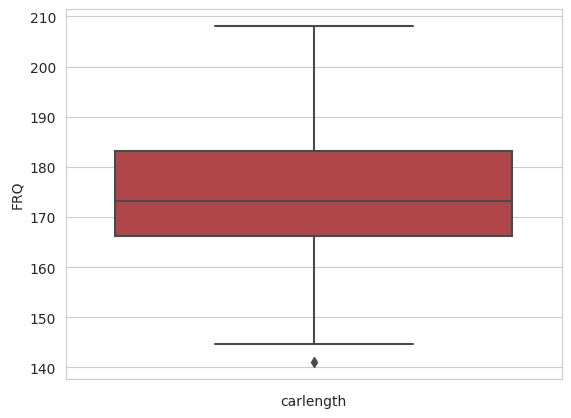

In [ ]:
# see distribution
box_plot ("carlength")
# call function i create it in cell 13

Average of cars length is 174

DISCOVERING CARHEIGHT COLUMN

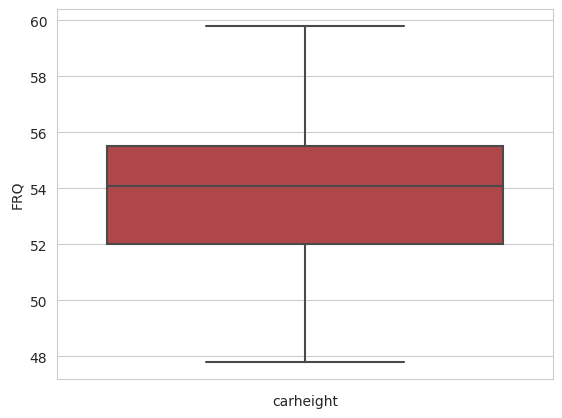

In [ ]:
# see distribution
box_plot("carheight")
# call function i create it in cell 13

DISCOVERING CURBWEIGHT COLUMN

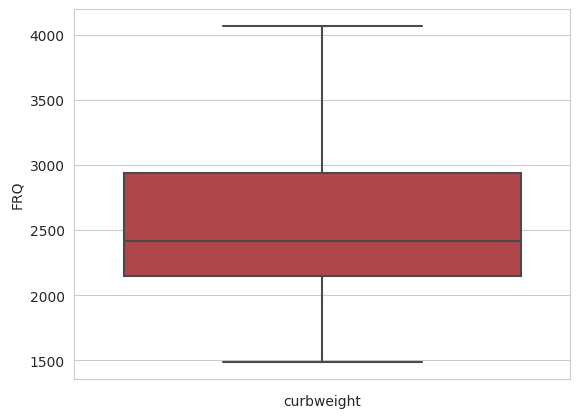

In [ ]:
# see distribution
box_plot("curbweight")
# call function i create it in cell 13

DISCOVERING ENGINETYPE COLUMN

In [ ]:
# see unique values
data["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

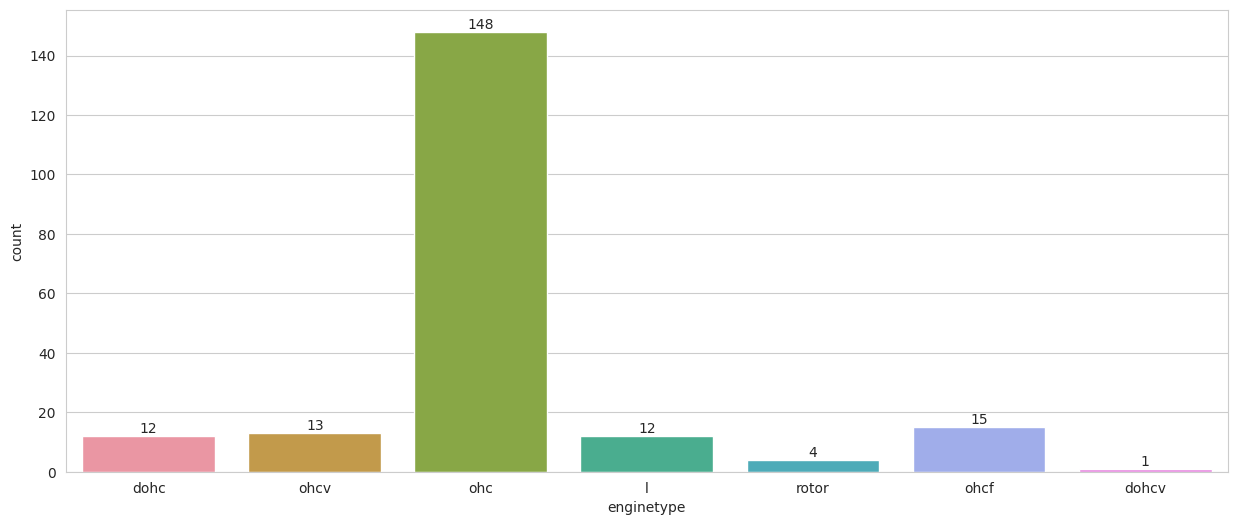

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "enginetype")

* Most cars have type of engine "Over Head Cam"

DISCOVERING CYLINDERNUMBER COLUMN

In [ ]:
# see unique values
data["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

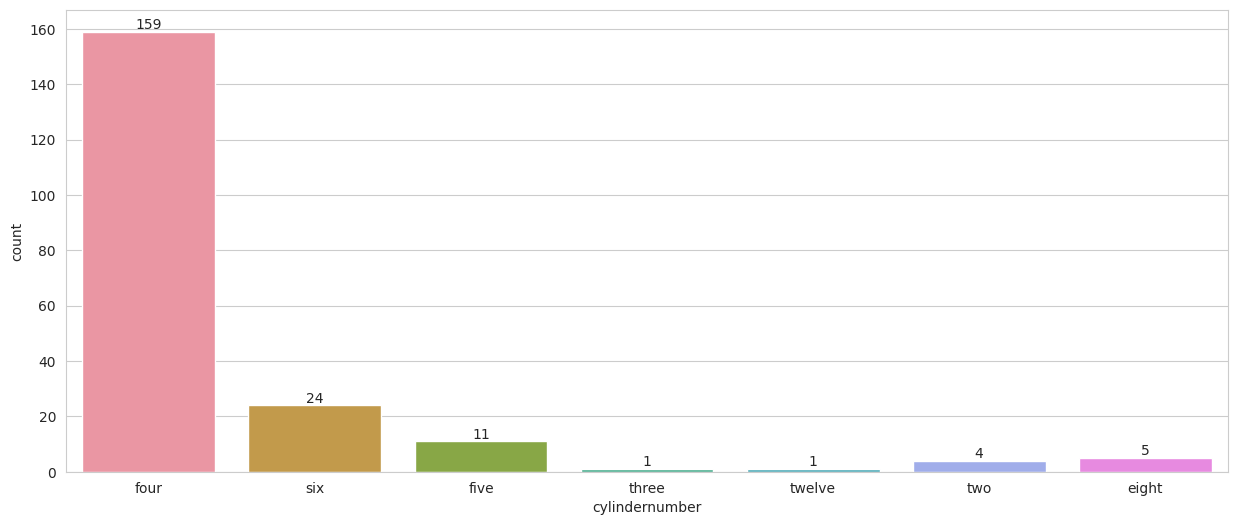

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "cylindernumber")

* Most cars have 4 Cylinders in the Engine

DISCOVERING FUELSYSTEM COLUMN

In [ ]:
 # see unique values
data["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

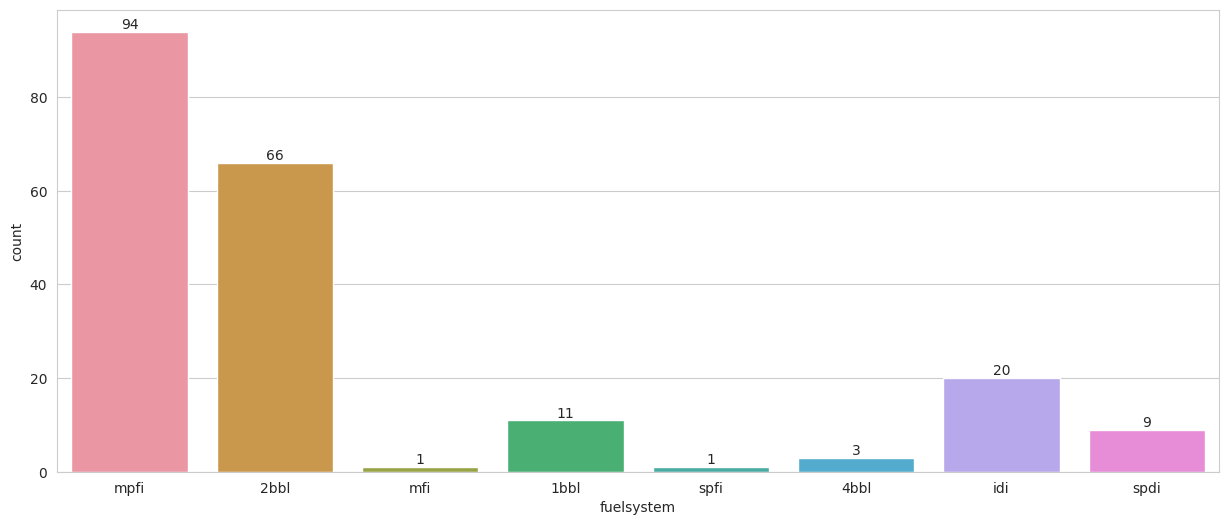

In [ ]:
# number of unique values is relatively large, count plot more suitable for it
# first set figure size
plt.figure(figsize = (15,6))
# call function i create it in cell 11
count_plot(column_name = "fuelsystem")

* Most cars used "Multi Point Fuel Injection"

DISCOVERING BORERATIO COLUMN

In [ ]:
 # see unique values
data["boreratio"].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.33, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

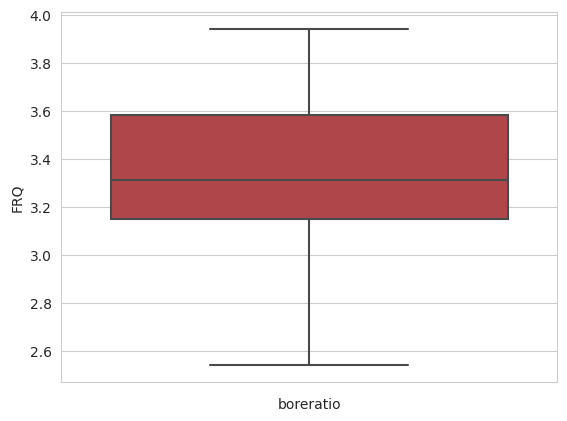

In [ ]:
# see distribution
box_plot("boreratio")
# call function i create it in cell 13

- avrage of boreration is 3.3 cm
- The Bore-to-Stroke Ratio is the ratio between the diameter of the engine cyclinder bore and the length of the piston stroke. It is an important factor that determines an engine's power and torque characterictics

BIVARIATE ANALYSIS & VISUALIZATIONS

1) What is price distribution with categorical columns)

In [ ]:
# create list of category columns
category_column = data.select_dtypes(include = object).columns.tolist()

In [ ]:
# create function that visualized categorical column with price column
def create_boxplot(x_axis, columns):
  sns.boxplot(y = x_axis, x = columns, data = data)
  plt.show()

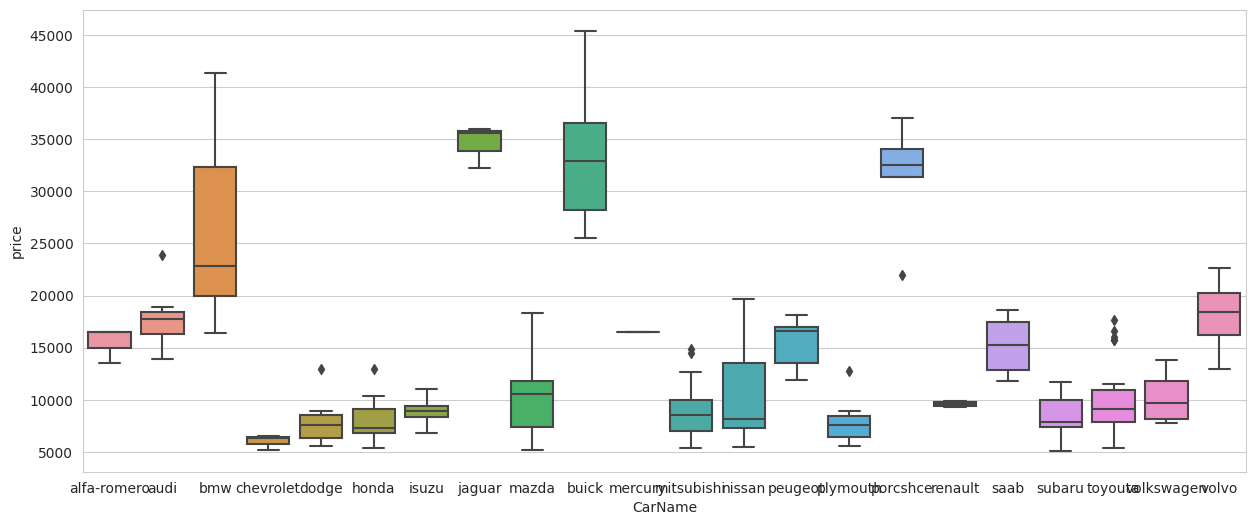

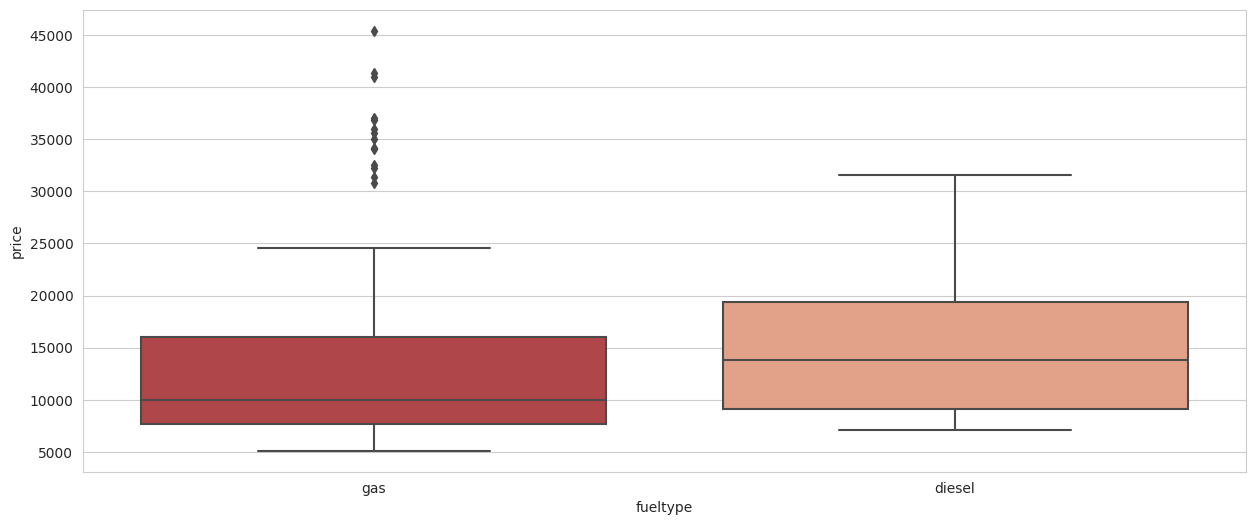

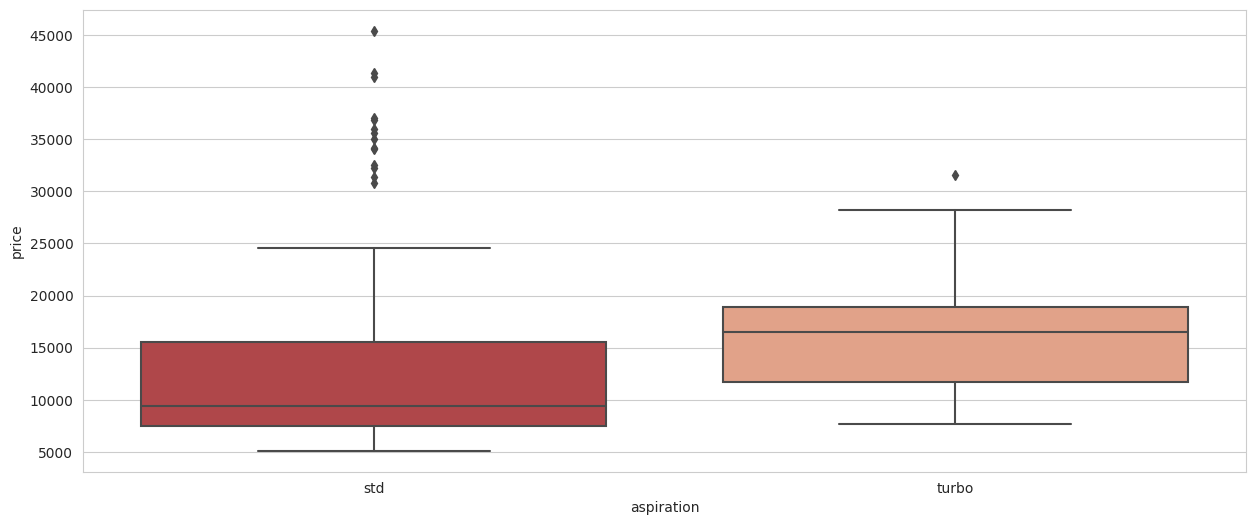

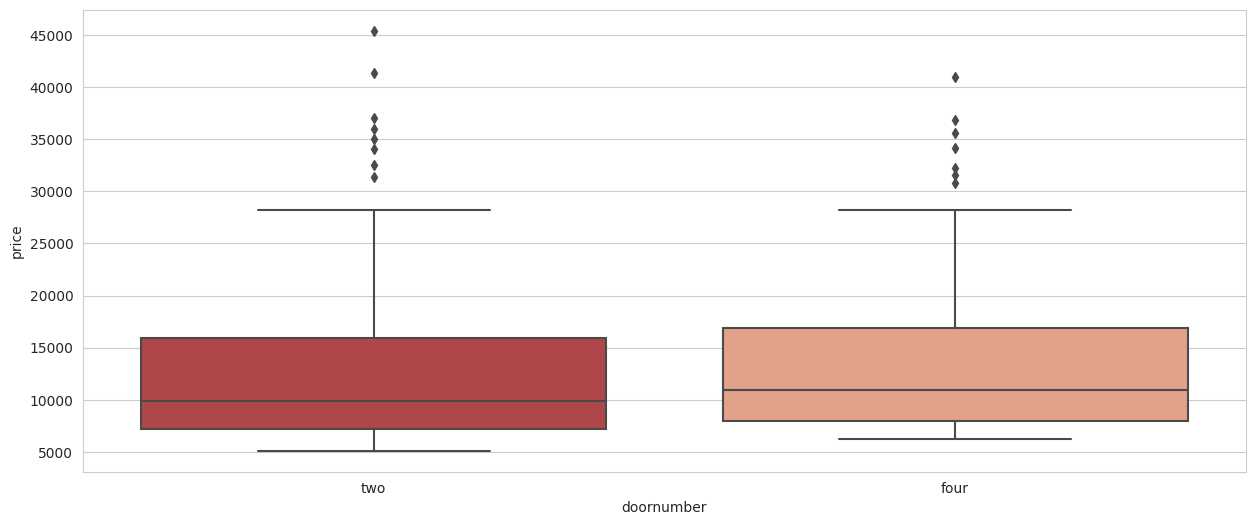

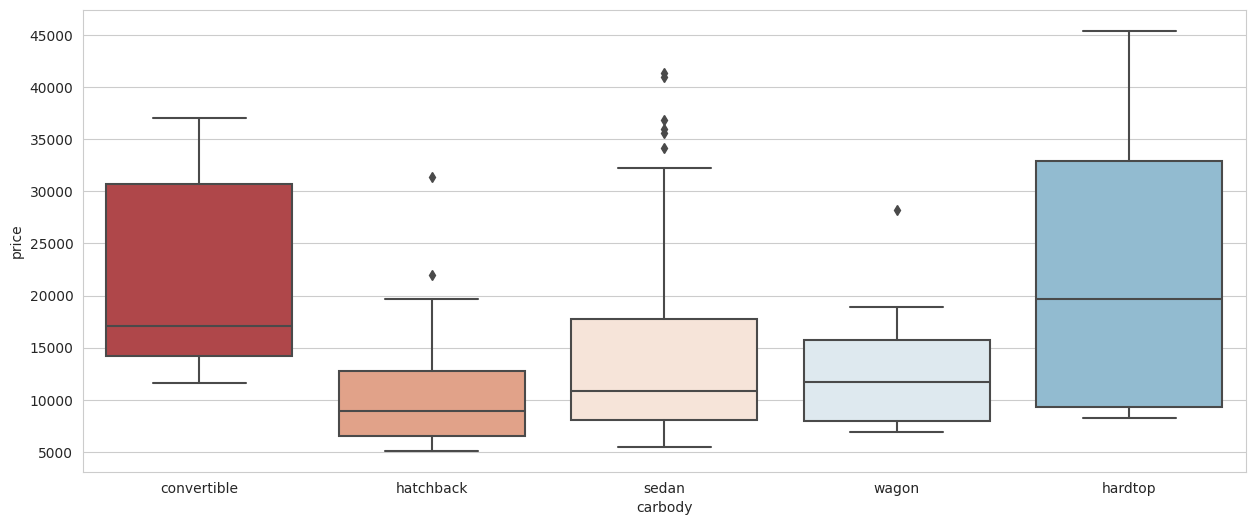

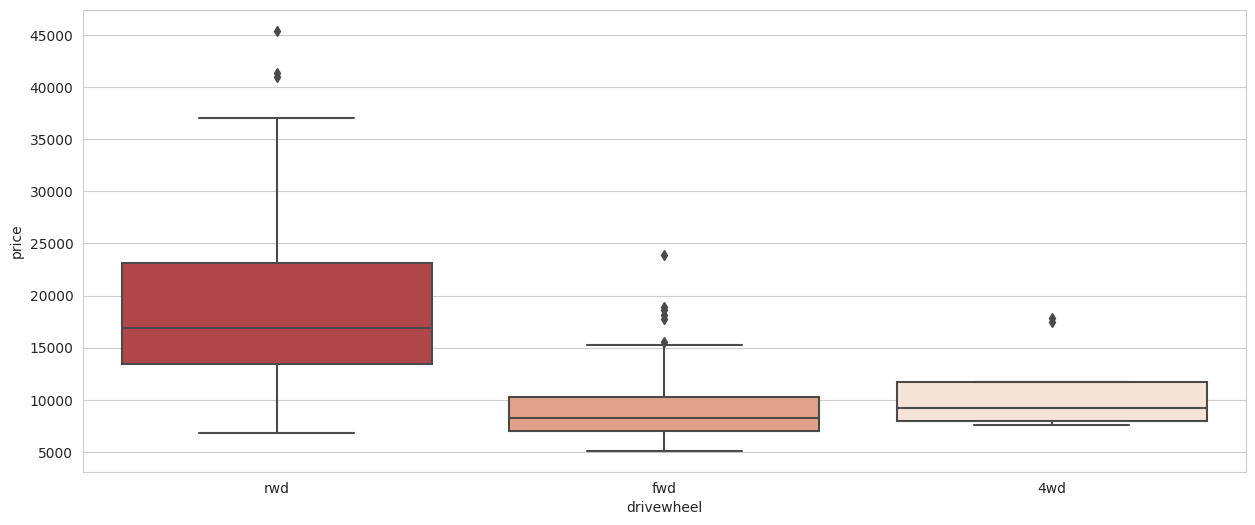

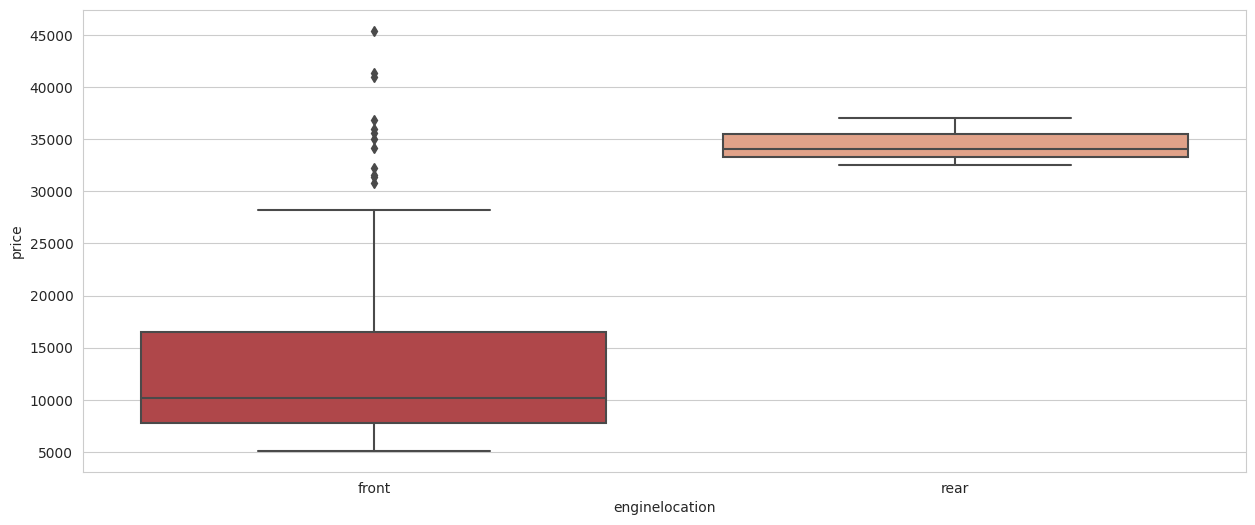

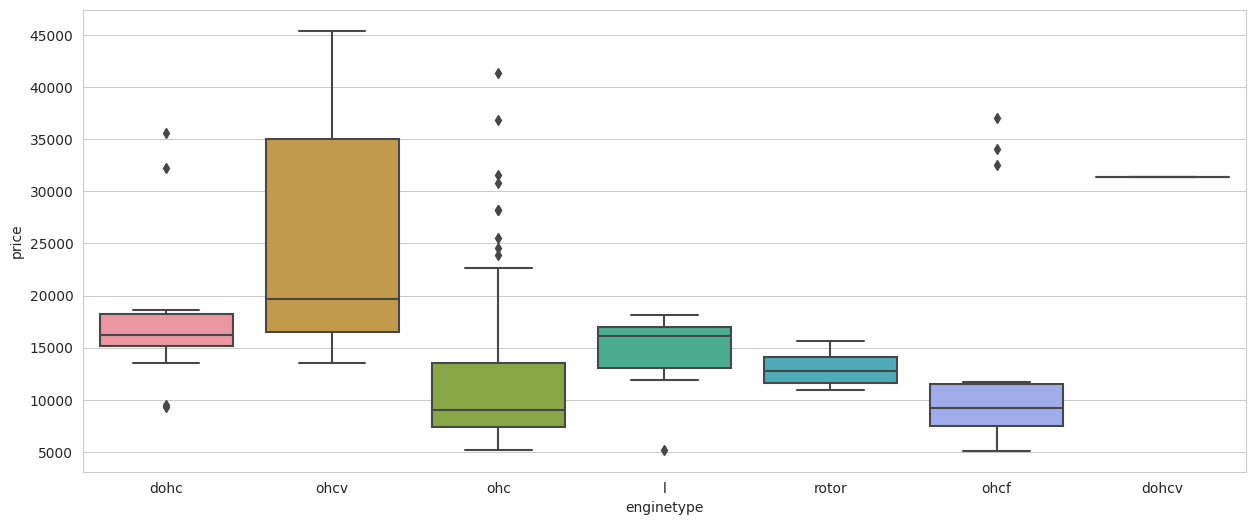

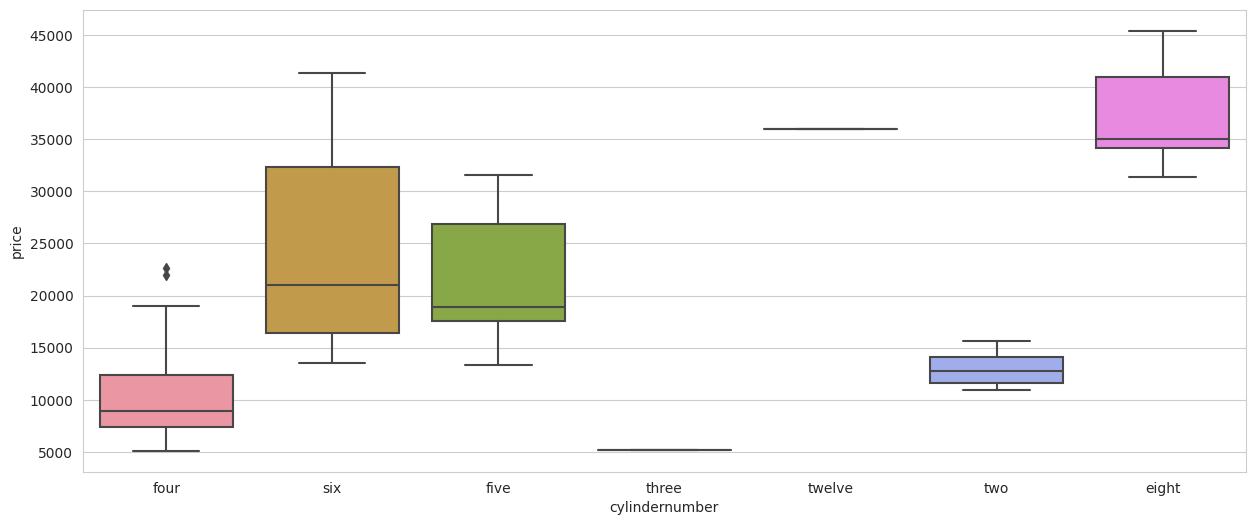

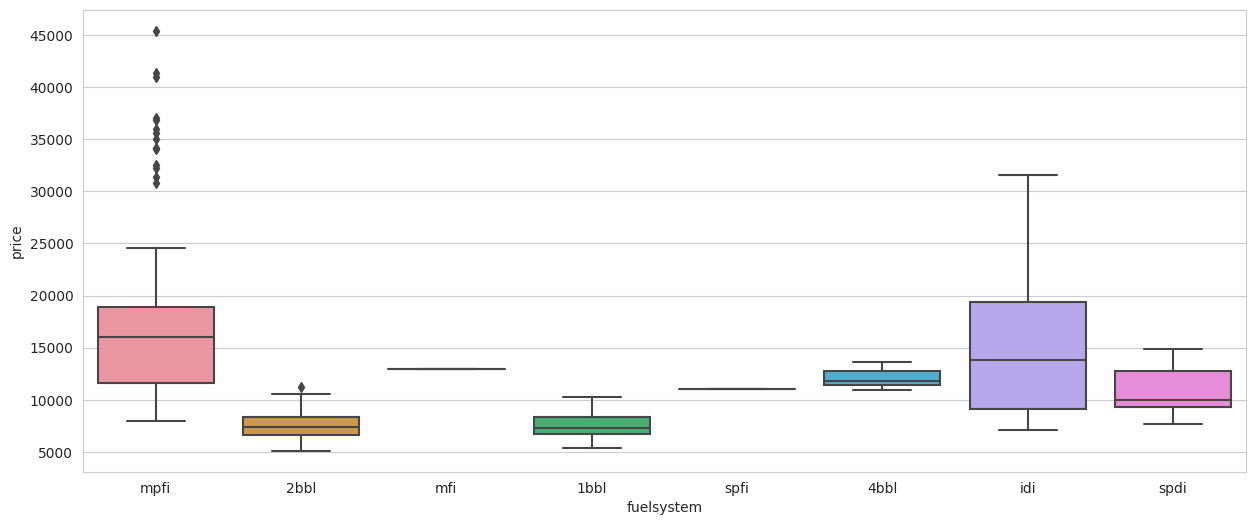

In [ ]:
# loop over category_column list from cell 46
for column in category_column:
   # set figure size
    plt.figure(figsize=(15,6))

    # call function i defined in cell 47
    create_boxplot("price", column)

We can understand some few things from these charts :
- In fueltype diesel is slitly expensive than gas
- In aspiration turbo cars are more expensive
- doornumbers don't have a strong effect on price
- All the types of carbody are cheaper as compared to "convertible" carbody
- The rwd is the most expensive drivewheel
- The cars with front enginelocation are way cheaper than cars with rear enginelocation.
- Enginetype ohcv has the highest price
- The cylindernumber affect the price proportionaly

2) What is price distribution with numerical columns?

In [ ]:
# create list of numerical column
numerical_column = data.select_dtypes(exclude = object).columns.tolist()[:-1]
# i slicing list ot remove price column

In [ ]:
# create function that visualized numerical column with price column

def create_scatterplot(x_axis, column_name):

    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        sns.scatterplot(x = x_axis, y = col, data = data)
        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

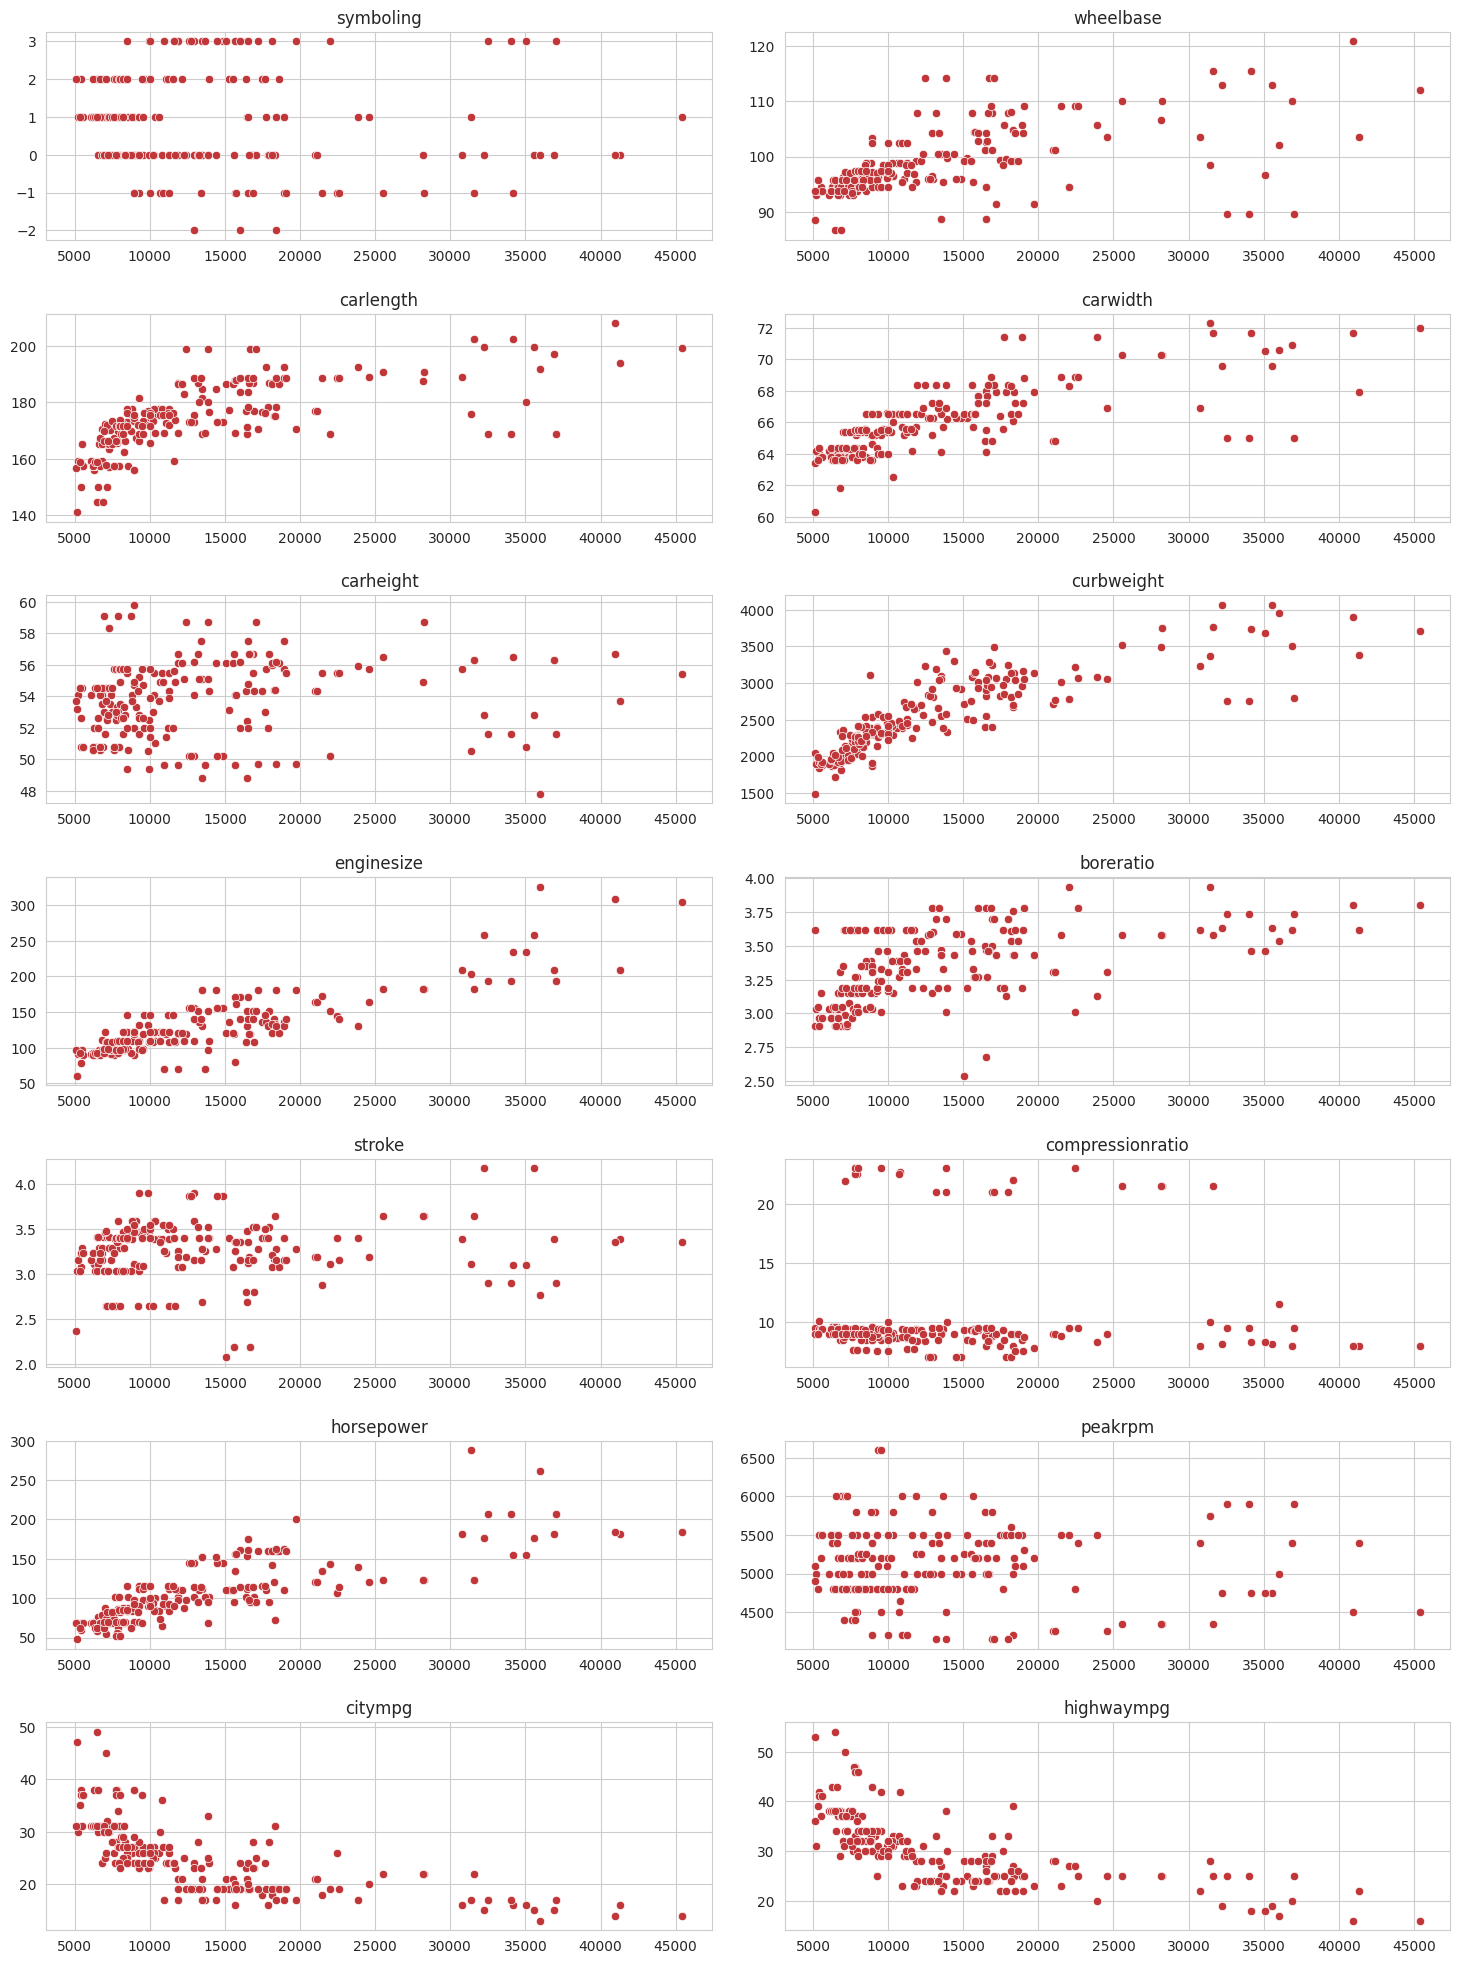

In [ ]:
# call function i create it in cell 50

create_scatterplot("price", numerical_column) # numerical_column list from cell 49

We can see :
- carwidth , carlength, curbweight ,enginesize and horsepower seems have a poitive correlation with price.
- other column don't have any correlation with price.

DATA PREPROCESSING

In [ ]:
# see categorical column

category_column

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [ ]:
# remove some column from category_column list, this column have weak relation with price column

category_column.remove("fuelsystem")
category_column.remove( "doornumber")
category_column.remove("enginelocation")

In [ ]:
# create object from labelencoder

encoder = LabelEncoder()

In [ ]:
# loop over category column to encoded it

for column in category_column:
    data[column] = encoder.fit_transform(data[column])

In [ ]:
# see data after encoding

data.sample(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
193,0,20,1,0,four,4,1,front,100.4,183.1,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
141,0,18,1,0,four,3,1,front,97.2,172.0,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
0,3,0,1,0,two,0,2,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [ ]:
# create list of droped columns
droped_columns = ["symboling","doornumber", "enginelocation", "fuelsystem", "highwaympg","compressionratio","stroke"]

# drop columns
data.drop(columns = droped_columns, inplace = True)

In [ ]:
# Spiting Data

target = data["price"]
training = data.drop(columns = ["price"])

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(training,target, test_size = 0.3, random_state = 42)

In [ ]:
# Scaling train data

scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
# create object from RandomForestRegressor

model = RandomForestRegressor()

In [ ]:
# fit model

model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# see predicted values

predict = model.predict(x_test)

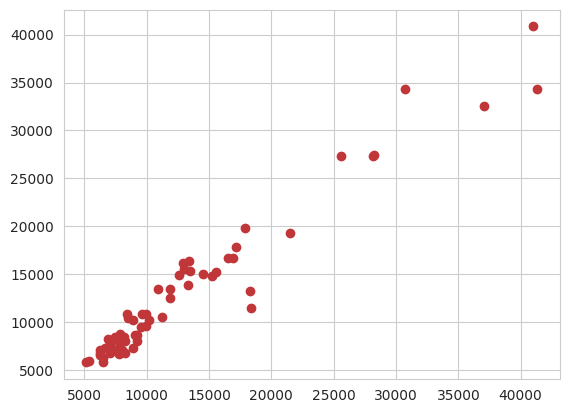

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
# see mean absolute error

mean_absolute_error(y_test,predict)

1325.8577634408603

In [ ]:
# see score

r2_score(y_test,predict)

0.9436769080448681